<a href="https://colab.research.google.com/github/Msamuelsons/recomendar-filmes/blob/main/teste_seletivo_elo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Odisseia do Projeto

## Prólogo
- Apresentação do cenário e da chamada para a jornada épica em busca da solução para o desafio de recomendação.

## Parte I: Aterra à Vista
### Conhecendo Nossa Base de Dados
- A descoberta inicial dos dados, como o avistamento de uma terra desconhecida.

### Explorando o Território
- A exploração detalhada dos dados, como mapear a geografia de uma nova ilha.

## Parte II: O Desafio dos Deuses
### "Quero um Filme!" - O Desafio de Recomendação
- A apresentação do desafio de recomendação, semelhante a um encontro com deuses e monstros mitológicos.

### A Decisão do Oráculo
- A definição de objetivos, como a busca por orientação divina para enfrentar os desafios.

## Parte III: A Jornada Heroica
### Minha Abordagem
- Descrição da abordagem heroica para resolver o problema, incluindo os aliados (algoritmos e técnicas) recrutados ao longo do caminho.

### A Busca do Santo Graal
- O processo de busca pela solução perfeita, semelhante à busca de tesouros lendários.

## Parte IV: O Retorno Triunfante
### Resultados e Troféus
- A exposição dos resultados gloriosos e dos prêmios conquistados, como a vitória em uma batalha épica.

### Lições dos Deuses
- Os aprendizados valiosos adquiridos durante a jornada, como conselhos dos deuses mitológicos.

## Epílogo
- Agradecimentos e visão do futuro, como o retorno a casa após a odisseia.





## Prólogo

Nossa jornada começa com a escolha do dataset Movie Lens, amplamente utilizado na avaliação de sistemas de recomendação de filmes. Essa rica base de dados contém avaliações e tags textuais fornecidas por usuários, revelando seus gostos cinematográficos.

Por meio deste [link](https://movielens.org/), tivemos acesso a um tesouro de informações que nos permitiria mergulhar no universo das preferências dos espectadores.

Nossa missão? Descobrir como transformar esses dados em recomendações de filmes precisas e envolventes. Com o dataset em mãos, embarcamos em nossa jornada, prontos para explorar, analisar e decifrar o segredo do entretenimento cinematográfico.

Siga-nos enquanto desvendamos os mistérios do Movie Lens e revelamos a magia por trás da Ciência de Dados aplicada à recomendação de filmes.


## Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Parte I: Aterra à Vista
### Conhecendo Nossa Base de Dados

- O arquivo contém algumas bases de dados .csv
As escolhidas para análise e treinamento são:

| Nome dos Arquivos | Tamanho dos Arquivos |
|-------------------|----------------------|
| tags.csv          | 16MB                 |
| movies.csv        | 1.4MB                |
| ratings.csv       | 533.4MB              |


In [2]:
rating_filmes = pd.read_csv('/content/drive/MyDrive/ratings.csv')
tag_filmes = pd.read_csv('/content/tags.csv')
label_filmes = pd.read_csv('/content/movies.csv')

In [3]:
rating_filmes.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
tag_filmes.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [5]:
label_filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Explorando o Território

In [6]:
informacoes = [
    ('rating_filmes', rating_filmes.shape[0], rating_filmes.shape[1]),
    ('tag_filmes', tag_filmes.shape[0], tag_filmes.shape[1]),
    ('label_filmes', label_filmes.shape[0], label_filmes.shape[1])
]

df_informacoes = pd.DataFrame(informacoes, columns=['Conjunto de Dados', 'Número de Linhas', 'Número de Colunas'])

print(df_informacoes.to_markdown(index=False))


| Conjunto de Dados   |   Número de Linhas |   Número de Colunas |
|:--------------------|-------------------:|--------------------:|
| rating_filmes       |           20000263 |                   4 |
| tag_filmes          |             353412 |                   4 |
| label_filmes        |              27278 |                   3 |


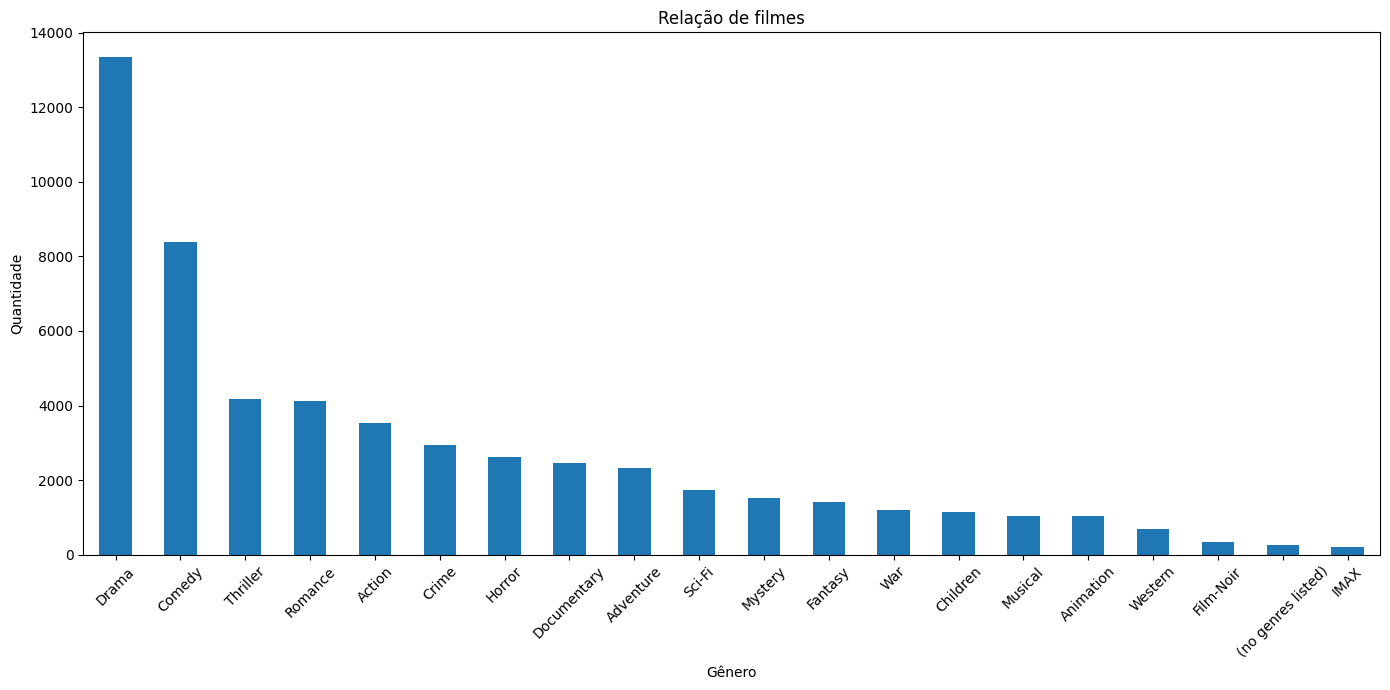

In [7]:

todos_generos = label_filmes['genres'].str.split('|', expand=True).stack()

# Contando a frequência de cada gênero
contagem_generos = todos_generos.value_counts()

contagem_generos.plot(kind='bar', figsize=(14,7))
plt.title("Relação de filmes")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## .
**Esse grafico pode mostrar alguns dados bem interessantes:**
--
1. O gênero "Drama" é o mais prevalente, com uma quantidade significativamente maior de filmes em comparação com outros gêneros.



> A prevalência de "Drama" pode ser parcialmente explicada pela sua frequente combinação com outros gêneros. Por exemplo, um filme classificado como "Drama/Horror" ou "Drama/Comedy" contribuiria para a contagem de todos os gêneros listados. Isso pode fazer com que "Drama" pareça mais prevalente do que realmente seria se considerássemos filmes estritamente dramáticos.



2. Gêneros de Nicho: "IMAX", "Film-Noir" e "Western" são gêneros que têm quantidades relativamente baixas de filmes, o que pode indicar que são nichos específicos no mundo cinematográfico.

3. Categorias Genéricas: A categoria "No genres listed" sugere que há filmes que não foram classificados em nenhum gênero específico ou que têm uma classificação ambígua.

4. Tendências ao Longo do Tempo: Embora este gráfico não mostre uma dimensão temporal, seria interessante explorar como a popularidade desses gêneros mudou ao longo dos anos. Por exemplo, "Western" pode ter sido mais popular em décadas anteriores em comparação com a atual.









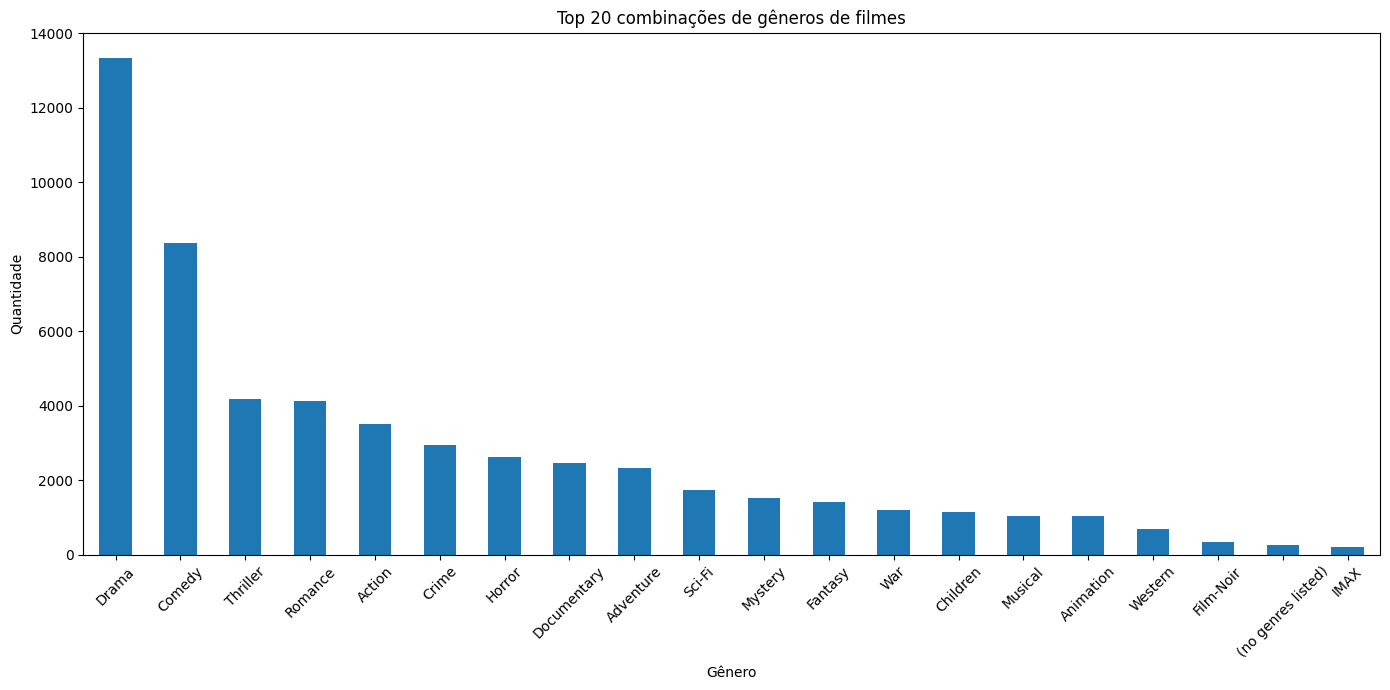

In [8]:

# Aqui faz uma listagem dos 20 itens mais populares

contagem_generos_top20 = contagem_generos.head(20)

contagem_generos_top20.plot(kind='bar', figsize=(14,7))
plt.title("Top 20 combinações de gêneros de filmes")
plt.ylabel("Quantidade")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* **Gêneros Menos Comuns:** A presença de gêneros como "Western" e "War" mais à direita sugere que são menos comuns ou talvez menos populares em comparação com outros gêneros.

* **Gostos de um gênero por outro:** Usuários que gostam de filmes categorizados sob "Drama" também podem ter uma inclinação para "Comedy|Drama" ou "Drama|Romance", já que estes gêneros ou combinações de gêneros são populares.

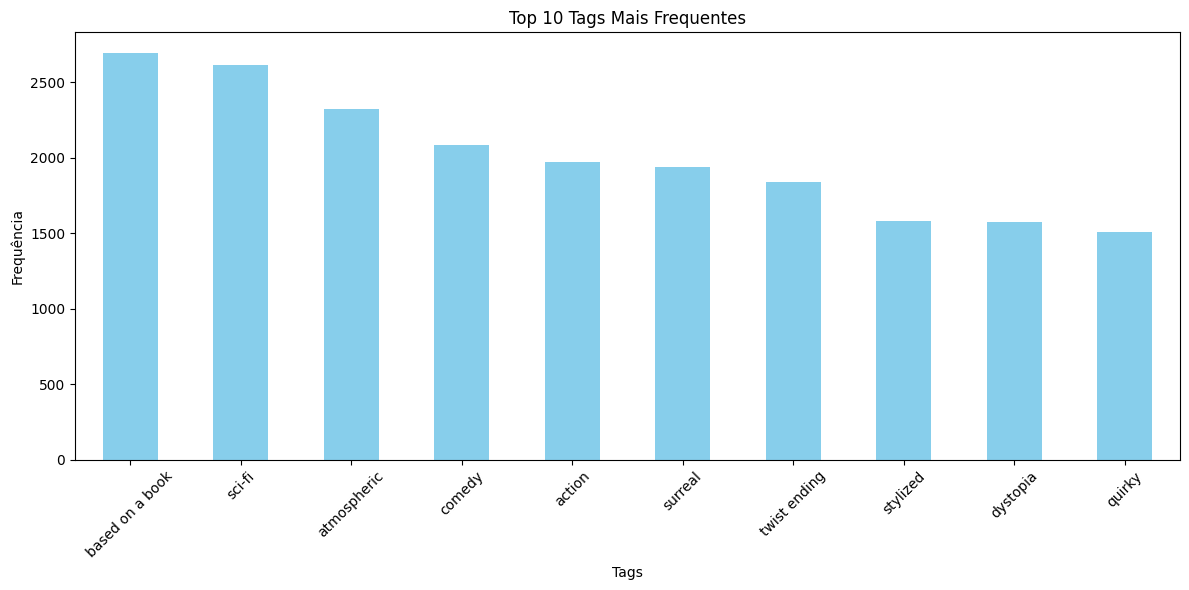

In [9]:
todas_tags = tag_filmes['tag']

contagem_tags = todas_tags.value_counts()

# Pegando as 10 tags mais frequentes
top_10_tags = contagem_tags.head(10)

plt.figure(figsize=(12, 6))
top_10_tags.plot(kind='bar', color='skyblue')
plt.title("Top 10 Tags Mais Frequentes")
plt.xlabel("Tags")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**<center>Algumas informações que podemons concluir nesse gráfico de frequência das tags:** </center>

---

* Elementos de Enredo: Tags como "twist ending" revelam que os espectadores valorizam e reconhecem reviravoltas inesperadas no enredo.

* Mundos Alternativos: A presença de tags como "dystopia" indica um interesse em histórias que exploram realidades alternativas, muitas vezes sombrias ou perturbadoras.

* Predominância de Estilos e Temáticas: "Sci-fi", "atmospheric" e "surreal" são as três tags mais frequentes, indicando uma tendência ou preferência para filmes que abordam temas futuristas, ambientes imersivos e elementos que desafiam a realidade convencional.


## Verificando os ratings

In [10]:
rating_filmes.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Nenhum dado faltante em rating ou seja todos deram alguma nota para o filme

In [11]:
rating_filmes['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [12]:
movieId_mais_frequente = rating_filmes['movieId'].value_counts().idxmax()
print(movieId_mais_frequente)

296


In [13]:
movieId_menor_frequente = rating_filmes['movieId'].value_counts().idxmin()
print(movieId_menor_frequente)

107100


In [14]:
label_filmes['title'].loc[label_filmes['movieId'] == 296]

293    Pulp Fiction (1994)
Name: title, dtype: object

O filme Pulp Fiction (1994) foi o filme mais avaliado

In [15]:
contagem = rating_filmes[rating_filmes['movieId'] == 296].shape[0]
print(f'O filme Pulp Fiction foi avaliado {contagem} vezes')


O filme Pulp Fiction foi avaliado 67310 vezes


In [16]:
label_filmes['title'].loc[label_filmes['movieId'] == movieId_menor_frequente]
contagem = rating_filmes[rating_filmes['movieId'] == movieId_menor_frequente].shape[0]
print(f'O Sambizanga foi avaliado {contagem} vezes')


O Sambizanga foi avaliado 1 vezes


In [17]:
merged = pd.merge(rating_filmes, label_filmes, on='movieId')
average_ratings = merged.groupby(['movieId', 'title'])['rating'].mean().reset_index()
top_10_filmes = average_ratings.sort_values(by='rating', ascending=False).head(10)
top_10_filmes

,movieId,title,rating
19152,95517,"Barchester Chronicles, The (1982)",5.0
21842,105846,Only Daughter (2013),5.0
17703,89133,Boys (Drenge) (1977),5.0
21656,105187,Linotype: The Film (2012),5.0
21658,105191,Rocaterrania (2009),5.0
17556,88488,"Summer Wishes, Winter Dreams (1973)",5.0
25936,126945,Small Roads (2011),5.0
21762,105526,Year Zero: The Silent Death of Cambodia (1979),5.0
21763,105529,Stealing a Nation (2004),5.0
21840,105841,B-Side (2013),5.0


Uma análise dos 10 melhores filmes e seus gêneros:

In [18]:
melhores_filmes_generos = pd.merge(top_10_filmes, label_filmes[['title', 'genres']], on='title', how='left')
melhores_filmes_generos.drop(columns=['movieId', 'rating'])

,title,genres
0,"Barchester Chronicles, The (1982)",Drama
1,Only Daughter (2013),Drama
2,Boys (Drenge) (1977),Drama
3,Linotype: The Film (2012),Documentary
4,Rocaterrania (2009),Documentary|Fantasy
5,"Summer Wishes, Winter Dreams (1973)",Drama
6,Small Roads (2011),(no genres listed)
7,Year Zero: The Silent Death of Cambodia (1979),Documentary
8,Stealing a Nation (2004),Documentary
9,B-Side (2013),Comedy|Romance


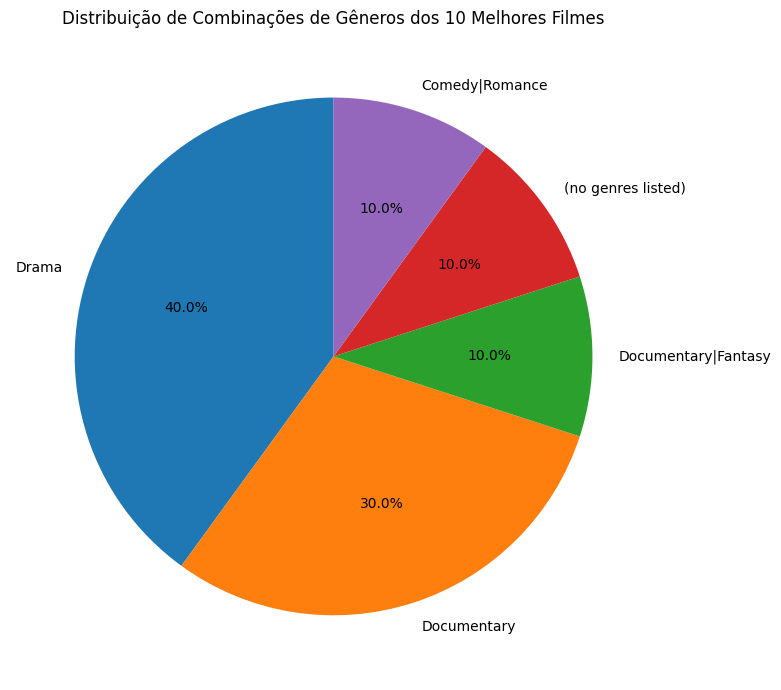

In [19]:
genre_combination_counts = melhores_filmes_generos['genres'].value_counts()
plt.figure(figsize=(10, 7))
genre_combination_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de Combinações de Gêneros dos 10 Melhores Filmes")
plt.ylabel('')
plt.tight_layout()
plt.show()

Uma de nossas teorias pode ser comprovada aqui. A maior fatia está relacionada ao gênero drama, com 40%. De fato, em nossa amostra, faz sentido que seja somente 40%. No entanto, os gêneros estão agregados. Como assim? Temos combinações como 'Comedy|Romance' ou 'Documentary|Fantasy', o que faz com que outros gêneros apresentem uma porcentagem reduzida

E se não houvesse agregação? Cada gênero seria único.

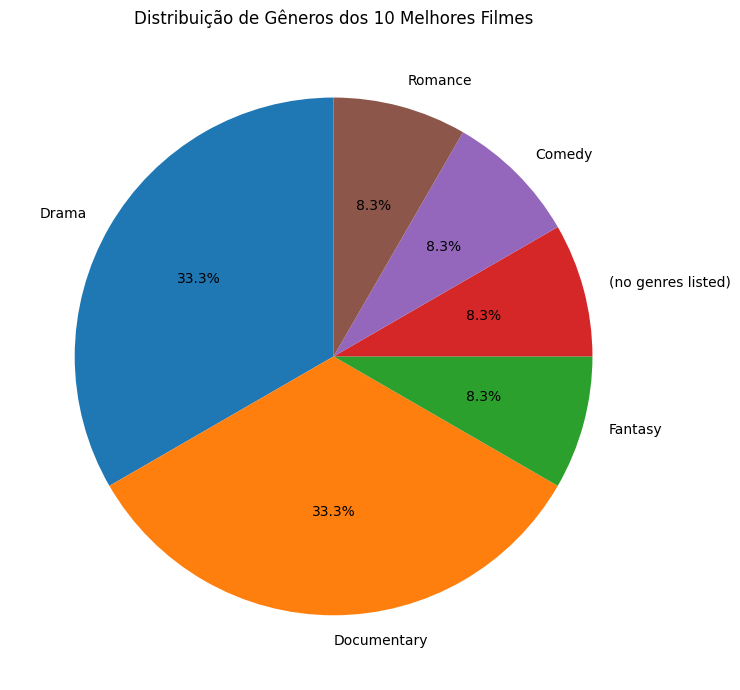

In [20]:
todos_generos = melhores_filmes_generos['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
contagem_generos = todos_generos.value_counts()
plt.figure(figsize=(10, 7))
contagem_generos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de Gêneros dos 10 Melhores Filmes")
plt.ylabel('')  # Isso é usado para remover o nome da coluna 'genres' que o pandas tenta adicionar ao gráfico de pizza
plt.tight_layout()
plt.show()

Ou seja filmes com múltiplos gêneros afetam de forma direta os a contagem dos próprios genêros

In [21]:
top_10_piores = average_ratings.sort_values(by='rating', ascending=True).head(10)
top_10_piores = top_10_piores[['title', 'rating']]
top_10_piores

,title,rating
24647,Double Trouble (1992),0.5
18913,Diverted (2009),0.5
26248,Hollow Point (1996),0.5
20718,Miss Castaway and the Island Girls (2004),0.5
21273,"Devil's in the Details, The (2013)",0.5
26249,Zeder (1983),0.5
24207,Alone for Christmas (2013),0.5
23185,"Golden Christmas, A (2009)",0.5
23186,"Golden Christmas 3, A (2012)",0.5
19755,Lookin' to Get Out (1982),0.5


Análise dos 10 piores em relação a seu gênero:

In [22]:
piores_filmes_generos = pd.merge(top_10_piores, label_filmes[['title', 'genres']], on='title', how='left')
piores_filmes_generos

,title,rating,genres
0,Double Trouble (1992),0.5,Action|Comedy|Crime|Romance
1,Diverted (2009),0.5,Drama
2,Hollow Point (1996),0.5,Action|Comedy|Thriller
3,Miss Castaway and the Island Girls (2004),0.5,Adventure|Comedy|Fantasy
4,"Devil's in the Details, The (2013)",0.5,Thriller
5,Zeder (1983),0.5,Horror
6,Alone for Christmas (2013),0.5,Action|Children|Comedy|Fantasy
7,"Golden Christmas, A (2009)",0.5,Children|Comedy|Romance
8,"Golden Christmas 3, A (2012)",0.5,Children|Comedy|Romance
9,Lookin' to Get Out (1982),0.5,Comedy


## Parte II: O Desafio dos Deuses


### "Quero um Filme!" - O Desafio de Recomendação

Na encruzilhada de nossa epopeia fílmica, com os olhos fitando o legado das escolhas passadas, erguemos o estandarte das futuras sagas. Prepare-se, viajante das tramas, pois as próximas páginas prometem os filmes mais grandiosos, forjados no caldeirão de teus próprios desejos.

-  Enfim, usaremos uma biblioteca chamada [Surprise](http://surpriselib.com/) a mais famosa lib de recomendação  
> A biblioteca [Surprise](http://surpriselib.com/)
 é uma biblioteca Python dedicada à criação e análise de sistemas de recomendação. Seu nome é um acrônimo para "Simple Python RecommendatIon System Engine". O objetivo da biblioteca é fornecer um conjunto de algoritmos de recomendação prontos para uso, assim como ferramentas para facilitar a pesquisa e o desenvolvimento de novos algoritmos.

### Instalação
*Dependendo do ambiente de desenvolvimento a instalação pode variar um pouco, como estou utilizando google colab segue abaixo:*

In [23]:
# instalação do surprise
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163338 sha256=7c87a3c56206de55c84e8e2726c6a23706a5a78f6c786e8d16fc294c0787789b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [24]:
rating_filmes.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


 Vamos entender um pouco nossa base de dados de avaliação:
* userId: Representa o id de cada usuário
* movieId: Representa o id de cada filme
* rating: Representa a nota de cada usuário em relação ao filme, sendo que mesmo usuário pode avaliar mais de um filme
* timestamp: Indica quando a avaliação foi realizada pelo usuário.


Para nosso algoritmo de recomendação, vamos usar somente as colunas

userId - movieId- rating

In [25]:
novo_dataset = rating_filmes.iloc[:, :3]
novo_dataset.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [26]:
# Vamos olhar o a quantidade de dados de avaliações disso
novo_dataset.shape

(20000263, 3)

Por mais que utilize, otimizadores em nosso modelo 20000263 é consideravelmente é uma grande quantidade de dados com isso uma das minhas alternativas foi segmentar isso, ou seja pegar uma grande parte de forma aleatoria dessas amostras

In [27]:
# amostragem aleatória
sample_size = 2000000
dataset_aleatoria = novo_dataset.sample(n=sample_size, random_state=42)

In [28]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1, 5))
dataset_surprise = Dataset.load_from_df(dataset_aleatoria[['userId', 'movieId', 'rating']], reader)
dataset_preenchido = dataset_surprise.build_full_trainset()

In [29]:
from surprise import SVDpp
from surprise.model_selection import cross_validate

model = SVDpp()
model.fit(dataset_preenchido)


In [30]:
predictions = model.test(dataset_surprise.build_full_trainset().build_testset())
predictions

[Prediction(uid=122270, iid=8360, r_ui=3.5, est=3.371571872617671, details={'was_impossible': False}),
 Prediction(uid=122270, iid=63082, r_ui=3.5, est=3.62483634675225, details={'was_impossible': False}),
 Prediction(uid=122270, iid=1073, r_ui=4.0, est=3.569212608318922, details={'was_impossible': False}),
 Prediction(uid=122270, iid=7327, r_ui=4.0, est=4.1372392889045075, details={'was_impossible': False}),
 Prediction(uid=122270, iid=2918, r_ui=3.5, est=3.619016292087151, details={'was_impossible': False}),
 Prediction(uid=122270, iid=1193, r_ui=5.0, est=4.3025265711526055, details={'was_impossible': False}),
 Prediction(uid=122270, iid=1982, r_ui=3.5, est=3.4108477201710357, details={'was_impossible': False}),
 Prediction(uid=122270, iid=1261, r_ui=5.0, est=4.278396655415612, details={'was_impossible': False}),
 Prediction(uid=122270, iid=2502, r_ui=3.0, est=4.048894125524708, details={'was_impossible': False}),
 Prediction(uid=122270, iid=48394, r_ui=3.5, est=3.948295943001642, de

In [31]:
len(predictions)

2000000

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate

modelo2 = SVD()
modelo2.fit(dataset_preenchido)
predictions2 = model.test(dataset_surprise.build_full_trainset().build_testset())
predictions2

In [32]:
from collections import defaultdict


def obtem_top_n(previsoes, n=5):
  top_n = defaultdict(list) # Cria um dicionario onde os valores são listados vazios
  for usuario, filme, _, previsao, _ in previsoes:
    top_n[usuario].append((filme, previsao)) # adiciona os pares de chave ao dicionario
  for usuario, previsoes_usuario in top_n.items():
    previsoes_usuario.sort(key=lambda x: x[1], reverse=True) # Ordena do maior pro menor o raiting
    top_n[usuario] = previsoes_usuario[:n] # Salva somente os primeiors valores
  return top_n


In [33]:
top_5 = obtem_top_n(predictions, n=5)
top_5[910]

for i in range(len(top_5[910])):
  print(top_5[910][i][0])



1304
953
1201
1234
1225


In [34]:
id_title_mapping = dict(zip(label_filmes['movieId'], label_filmes['title']))

top_5_movie_ids = [item[0] for item in top_5[500]]

top_5_movie_titles = [id_title_mapping[movie_id] for movie_id in top_5_movie_ids]

for title in top_5_movie_titles:
    print(title)


Monty Python and the Holy Grail (1975)
Brazil (1985)
Shawshank Redemption, The (1994)
Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)
Alien (1979)


### Parte III: A Jornada Heroica

Antes de explicar sobre tais modelos gostaria que visse esse artigo: [SISTEMAS DE RECOMENDAÇÃO](https://blog.somostera.com/data-science/sistemas-de-recomendacao/) onde vai mostrar como o que é um Sistema de recomendação e como funciona



---



Caro leitor, nesta jornada, irei explicar o que cada modelo faz e o que é.

Imagine que você é o mestre de um RPG e tem um grupo de jogadores. Cada um desses jogadores gosta de diferentes aspectos do jogo: alguns preferem lutar contra monstros, outros gostam de resolver enigmas e mistérios, enquanto alguns se deleitam em interagir com personagens não-jogadores e explorar histórias complexas.

SVD (Singular Value Decomposition):
Pense no SVD como um assistente inteligente que ajuda você, o mestre, a criar aventuras personalizadas para seu grupo. Esse assistente observa as aventuras passadas e as reações dos jogadores: quem gostou de lutar contra o dragão, quem se destacou desvendando o código secreto do mago, e assim por diante. Com essas informações, o SVD sugere novos desafios e aventuras, garantindo que haja algo que cada jogador goste com base no que eles mostraram preferir nas sessões anteriores. Ele é eficaz, mas considera apenas as ações explícitas dos jogadores, como suas reações diretas aos eventos da campanha.

SVD++:
Agora, o SVD++ é como um assistente que tem uma percepção quase mágica. Além de observar as ações explícitas dos jogadores, ele também nota os pequenos detalhes: quem pareceu secretamente satisfeito quando encontrou um artefato antigo, mesmo que não dissesse nada, ou quem se inclinou mais para a mesa durante uma cena de negociação tensa. O SVD++ percebe não só o que os jogadores fazem, mas também o que eles parecem gostar implicitamente, até mesmo as sutilezas que eles mesmos podem não ter notado. Ele usa esses insights para ajudar você a moldar uma campanha que não só se alinha com os gostos declarados dos jogadores, mas também com as preferências que eles demonstram indiretamente.

Assim, se você quer fazer com que cada sessão de RPG seja o mais emocionante possível para todos os jogadores, escolher o SVD++ é como ter um assistente que compreende os desejos não ditos e as inclinações subtis de seus jogadores, permitindo que você crie uma aventura que todos vão adorar, muitas vezes de maneiras que eles mesmos podem não esperar.







### Parte IV: O Retorno Triunfante

In [35]:
from surprise import accuracy
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(dataset_surprise, test_size=0.2)

model.fit(trainset)

test_predictions = model.test(testset)

In [40]:
from surprise import accuracy
from surprise.model_selection import train_test_split

trainset2, testset2 = train_test_split(dataset_surprise, test_size=0.2)

modelo2.fit(trainset2)

test_predictions2 = modelo2.test(testset2)
mae = accuracy.mae(test_predictions2)
rmse = accuracy.rmse(test_predictions2)
mse = accuracy.mse(test_predictions2)
fcp = accuracy.fcp(test_predictions2)

print(f'MAE: {mae}')
print(f'RMSE:{rmse}')
print(f'RMSE:{mse}')
print(f'RMSE:{fcp}')

MAE:  0.6939
RMSE: 0.8999
MSE: 0.8098
FCP:  0.6341
MAE: 0.693905436530648
RMSE:0.8998691378979876
RMSE:0.8097644653412674
RMSE:0.6341138147750017


In [38]:
mae = accuracy.mae(test_predictions)
rmse = accuracy.rmse(test_predictions)
mse = accuracy.mse(test_predictions)
fcp = accuracy.fcp(test_predictions)

print(f'MAE: {mae}')
print(f'RMSE:{rmse}')
print(f'RMSE:{mse}')
print(f'RMSE:{fcp}')

MAE:  0.6743
RMSE: 0.8773
MSE: 0.7697
FCP:  0.6465
MAE: 0.6742796433824407
RMSE:0.8773416766898241
RMSE:0.7697284176569118
RMSE:0.6464980572326148


            SVD   SVDpp
Métrica                
MAE      0.6939  0.6743
RMSE     0.8999  0.8773
MSE      0.8098  0.7697
FCP      0.6341  0.6465


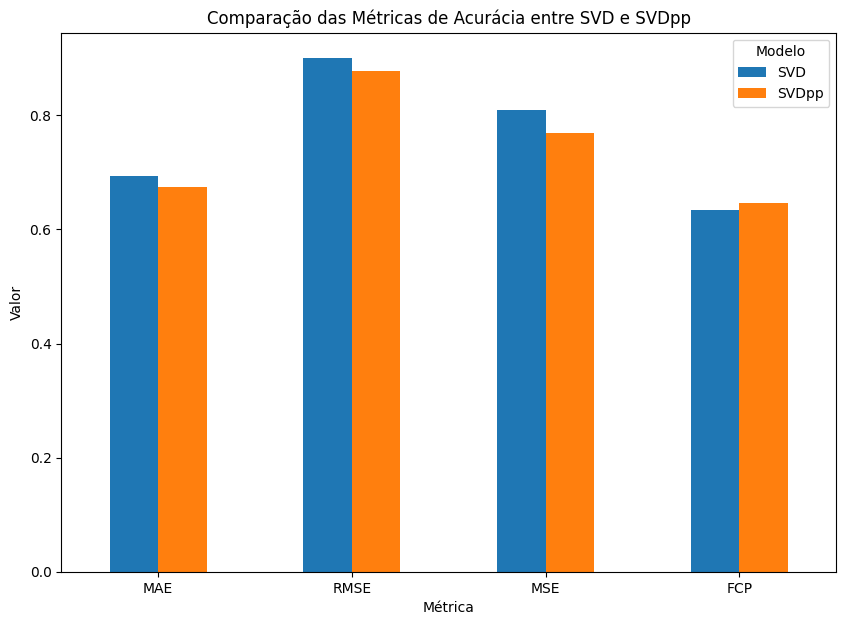

In [41]:


data = {
    'Métrica': ['MAE', 'RMSE', 'MSE', 'FCP'],
    'SVD': [0.6939, 0.8999, 0.8098, 0.6341],
    'SVDpp': [0.6743, 0.8773, 0.7697, 0.6465]
}

df = pd.DataFrame(data)

df.set_index('Métrica', inplace=True)

print(df)

df.plot(kind='bar', figsize=(10, 7))

plt.title('Comparação das Métricas de Acurácia entre SVD e SVDpp')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.xticks(rotation=0)
plt.legend(title='Modelo')

plt.show()


Bom, então qual o modelo foi superior SVD ou SVDpp ?

> Em todas essas métricas, o SVD++ supera o SVD, indicando que o SVD++ é o modelo superior para este conjunto específico de dados e tarefas de previsão. Isso pode ser atribuído ao fato de que o SVD++ leva em consideração não apenas as interações explícitas dos usuários (como as classificações), mas também as interações implícitas (como se um usuário visualizou um item, mas não o classificou), permitindo que ele capture mais nuances no comportamento dos usuários.

### Lições dos Deuses

Você, caro leitor desta jornada épica, deve estar se perguntando agora: por que o SVD++ é melhor se as barras do SVD são maiores nos gráficos? A resposta para isso é simples: valores mais baixos nessas métricas significam que o modelo tem, em média, um erro menor nas previsões. Quanto à métrica FCP, a barra laranja é mais alta que a azul, o que é positivo, pois indica uma maior proporção de pares concordantes.

# Epílogo
Por fim, queria agradecer aos caros leitores por acompanharem a forma como esta história foi contada. Gostaria de expressar meu sincero agradecimento à equipe do Elo7 pela iniciativa de publicar este projeto. Em um campo de crescimento estratosférico, como é a Ciência de Dados, a publicação de projetos como este é de grande importância, considerando o cenário em constante evolução.

Também gostaria de estender meus agradecimentos aos amigos que atuaram como meu público de teste, bem como a várias outras pessoas que, embora desconhecidas pessoalmente, demonstraram generosidade e atenção nos fóruns de pesquisa. Seu apoio e envolvimento foram fundamentais para enriquecer esta jornada, e por isso sou profundamente grato.
